In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('data_sem_pca.csv')
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,...,keyword_xmen,keyword_yacht,keyword_yakuza,keyword_yardsale,keyword_youngerversionofcharacter,keyword_zeus,keyword_zombie,keyword_zombieapocalypse,keyword_zoo,keyword_zorro
0,0.889163,0.529412,0.391321,0.037090,0.001559,1.000000,0.524453,0.007358,0.603479,0.019402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.370690,0.501548,0.024393,0.043395,0.062497,0.406840,0.278865,0.073620,0.244515,0.024559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.740148,0.436533,0.012140,0.006914,0.017184,0.263080,0.163256,0.017813,0.196284,0.020056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.486068,0.956518,1.000000,0.042185,0.589253,0.677216,0.162559,0.533702,0.020466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.567734,0.386997,0.020567,0.022959,0.000997,0.096066,0.125579,0.002849,0.145681,0.021587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Variáveis experimentais
ks = [i for i in range(1,21)]
knnresults = {}
treeresults={}
svmresults={}
k_history = {}

## 1. Número de curtidas na página do filme do facebook

In [4]:
title = 'Número de curtidas na página do filme do facebook'
variable = 'movie_facebook_likes'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [5]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree')
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
    kresults.append(abs(result.mean() * 100))
k_history[variable] = kresults

(Text(0.5,1,'Escore IMDb\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     14.429685
 2     12.705368
 3     11.912899
 4     11.600569
 5     11.311145
 6     11.156758
 7     11.061840
 8     10.965297
 9     10.891222
 10    10.847611
 11    10.785852
 12    10.759055
 13    10.731408
 14    10.734413
 15    10.704245
 16    10.704587
 17    10.687170
 18    10.669227
 19    10.646473
 20    10.637663
 dtype: float64)

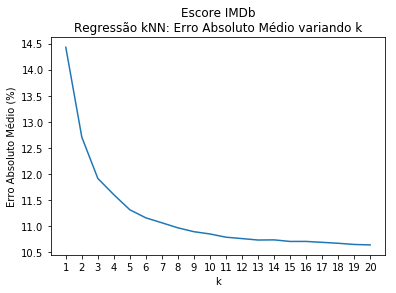

In [42]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [7]:
# adotando k=9
k=9
knnresults[variable] = kresults[k-1]
knnresults[variable]

3.3849668919285474

### Árvore de Decisão

In [8]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean() * 100)
treeresults[variable]

3.014828100405665

### SVM

In [9]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean() * 100)
svmresults[variable]

6.840148419073976

## 2. Número de avaliações por usuário

In [10]:
title = 'Número de avaliações por usuário'
variable = 'num_user_for_reviews'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [11]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree')
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
    kresults.append(abs(result.mean() * 100))
k_history[variable] = kresults

(Text(0.5,1,'Escore IMDb\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     14.429685
 2     12.705368
 3     11.912899
 4     11.600569
 5     11.311145
 6     11.156758
 7     11.061840
 8     10.965297
 9     10.891222
 10    10.847611
 11    10.785852
 12    10.759055
 13    10.731408
 14    10.734413
 15    10.704245
 16    10.704587
 17    10.687170
 18    10.669227
 19    10.646473
 20    10.637663
 dtype: float64)

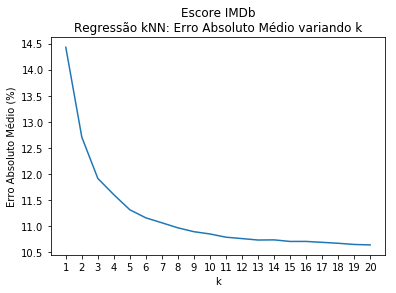

In [43]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [13]:
# Adotando k = 11
k=11
knnresults[variable] = kresults[k-1]
knnresults[variable]

4.133431984958501

### Árvore de Decisão

In [14]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean() * 100)
treeresults[variable]

2.288381887370775

### SVM

In [15]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean() * 100)
svmresults[variable]

7.484432637532429

## 3. Número de revisões críticas

In [16]:
title = 'Número de Revisões Críticas'
variable = 'num_critic_for_reviews'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [17]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree')
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
    kresults.append(abs(result.mean() * 100))
k_history[variable] = kresults

(Text(0.5,1,'Escore IMDb\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     14.429685
 2     12.705368
 3     11.912899
 4     11.600569
 5     11.311145
 6     11.156758
 7     11.061840
 8     10.965297
 9     10.891222
 10    10.847611
 11    10.785852
 12    10.759055
 13    10.731408
 14    10.734413
 15    10.704245
 16    10.704587
 17    10.687170
 18    10.669227
 19    10.646473
 20    10.637663
 dtype: float64)

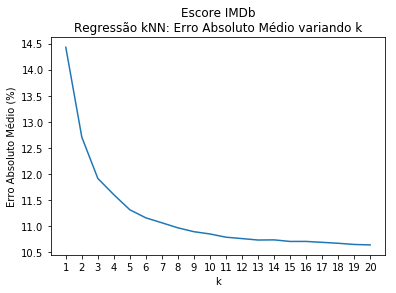

In [44]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [19]:
# Adotando k = 11
k=11
knnresults[variable] = kresults[k-1]
knnresults[variable]

9.005788469670167

### Árvore de Decisão

In [20]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean() * 100)
treeresults[variable]

4.9119969356152655

### SVM

In [21]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean() * 100)
svmresults[variable]

8.869283638576434

## 4. Número de Votos

In [22]:
title = 'Número de Votos'
variable = 'num_voted_users'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [23]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree')
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
    kresults.append(abs(result.mean() * 100))
k_history[variable] = kresults

(Text(0.5,1,'Escore IMDb\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     14.429685
 2     12.705368
 3     11.912899
 4     11.600569
 5     11.311145
 6     11.156758
 7     11.061840
 8     10.965297
 9     10.891222
 10    10.847611
 11    10.785852
 12    10.759055
 13    10.731408
 14    10.734413
 15    10.704245
 16    10.704587
 17    10.687170
 18    10.669227
 19    10.646473
 20    10.637663
 dtype: float64)

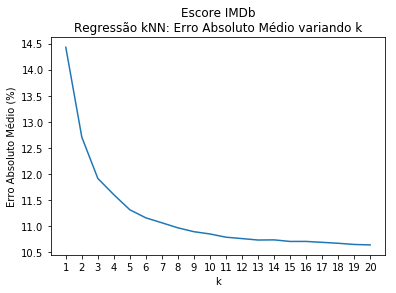

In [45]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [25]:
# Adotando k = 10
k = 10
knnresults[variable] = kresults[k-1]
knnresults[variable]

4.586470078821841

### Árvore de Decisão

In [26]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean() * 100)
treeresults[variable]

2.17579726897603

### SVM

In [27]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean() * 100)
svmresults[variable]

8.08383711213629

## 5. Arrecadação

In [28]:
title = 'Arrecadação'
variable = 'gross'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [29]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree')
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
    kresults.append(abs(result.mean() * 100))
k_history[variable] = kresults

(Text(0.5,1,'Escore IMDb\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     14.429685
 2     12.705368
 3     11.912899
 4     11.600569
 5     11.311145
 6     11.156758
 7     11.061840
 8     10.965297
 9     10.891222
 10    10.847611
 11    10.785852
 12    10.759055
 13    10.731408
 14    10.734413
 15    10.704245
 16    10.704587
 17    10.687170
 18    10.669227
 19    10.646473
 20    10.637663
 dtype: float64)

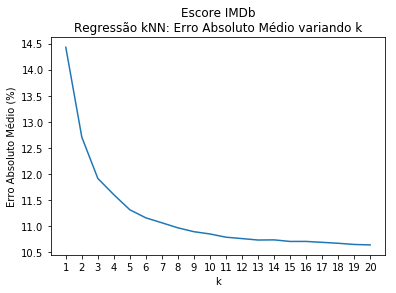

In [41]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [31]:
# Adotando k = 10
k=10
knnresults[variable] = kresults[k-1]
knnresults[variable]

5.064743264536

### Árvore de Decisão

In [32]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean() * 100)
treeresults[variable]

4.338059794523037

### SVM

In [33]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean() * 100)
svmresults[variable]

7.457923646025658

## 6. Escore IMDb

In [34]:
title = 'Escore IMDb'
variable = 'imdb_score'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [35]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree')
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
    kresults.append(abs(result.mean() * 100))
k_history[variable] = kresults

(Text(0.5,1,'Escore IMDb\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     14.429685
 2     12.705368
 3     11.912899
 4     11.600569
 5     11.311145
 6     11.156758
 7     11.061840
 8     10.965297
 9     10.891222
 10    10.847611
 11    10.785852
 12    10.759055
 13    10.731408
 14    10.734413
 15    10.704245
 16    10.704587
 17    10.687170
 18    10.669227
 19    10.646473
 20    10.637663
 dtype: float64)

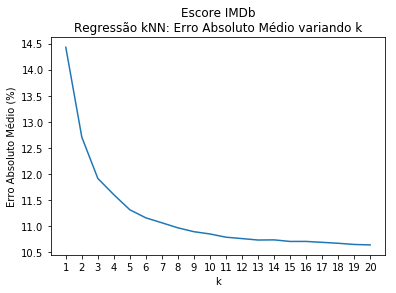

In [46]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [37]:
# Adotando k = 8
k = 8
knnresults[variable] = kresults[k-1]
knnresults[variable]

10.965296516645425

### Árvore de Decisão

In [38]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean() * 100)
treeresults[variable]

9.614450290621896

### SVM

In [39]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean() * 100)
svmresults[variable]

9.708082371468299

# Visão Geral

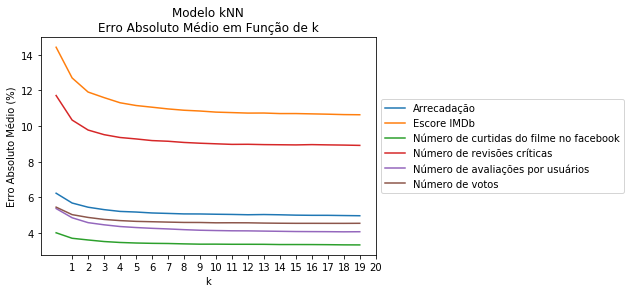

In [72]:
khistory_df = pd.DataFrame(k_history)
plot = khistory_df.plot(kind='line')
plot.set_xticks(ks)
plot.set_title('Modelo kNN\nErro Absoluto Médio em Função de k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_xlabel('k')
patches, labels = plot.get_legend_handles_labels()
labels = ['Arrecadação', 'Escore IMDb', 'Número de curtidas do filme no facebook', 'Número de revisões críticas', 'Número de avaliações por usuários', 'Número de votos']
plot.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0.5))


[Text(0,0,'Arrecadação'),
 Text(0,0,'Escore IMDb'),
 Text(0,0,'Número de curtidas do filme no facebook'),
 Text(0,0,'Número de revisões críticas'),
 Text(0,0,'Número de avaliações por usuários'),
 Text(0,0,'Número de votos')]

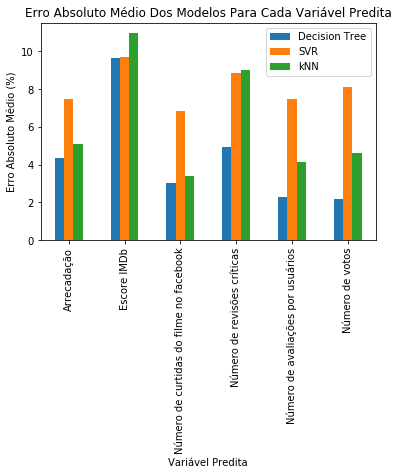

In [75]:
full_results = {
    'kNN': knnresults,
    'Decision Tree': treeresults,
    'SVR': svmresults
}
full_results = pd.DataFrame(full_results)
plot = full_results.plot(kind='bar')
plot.set_title('Erro Absoluto Médio Dos Modelos Para Cada Variável Predita')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_xlabel('Variável Predita')
plot.set_xticklabels(['Arrecadação', 'Escore IMDb', 'Número de curtidas do filme no facebook', 
                      'Número de revisões críticas', 'Número de avaliações por usuários', 'Número de votos'])